In [227]:
library(data.table)
library(dplyr)
library(tidyr)
library(forcats)
library(ggplot2)
library(cowplot)
library(ggsci)

In [228]:
options(repr.plot.width=6, repr.plot.height=6)

In [229]:
fname = "../data/benchmark/2comb/res1-1.txt"

In [260]:
d <- fread(fname) %>%
    mutate(
        sigtype = as.factor(sigtype),
        sig1 = as.factor(sig1),
        sig2 = as.factor(sig2),
        ratio = as.factor(ratio),
        noise = as.factor(noise),
        nmut = as.factor(nmut),
        method = factor(method, levels=c('original', 'aicc', 'aiccz', 'mle', 'ds')),
        signature = as.factor(signature),
        contribution = value,
    ) %>%
    filter(
        sigtype == 30,
        method %in% c('original', 'aicc', 'aiccz', 'mle', 'ds')
    ) %>%
    mutate(
        method = fct_recode(method,
           'target' = "original",
            "AICc" = "aicc",
            "dSigs" = "ds",
           "AICcZ" = "aiccz",
           "MLE" = "mle"
          )
    )
head(d)

Read 17920000 rows and 10 (of 10) columns from 0.558 GB file in 00:00:08


sigtype,sig1,sig2,ratio,noise,nmut,replica,method,signature,value,contribution
30,10,1,5,10,500,0,target,1,0.5,0.5
30,10,1,5,10,500,0,target,2,0.0,0.0
30,10,1,5,10,500,0,target,3,0.0,0.0
30,10,1,5,10,500,0,target,4,0.0,0.0
30,10,1,5,10,500,0,target,5,0.0,0.0
30,10,1,5,10,500,0,target,6,0.0,0.0


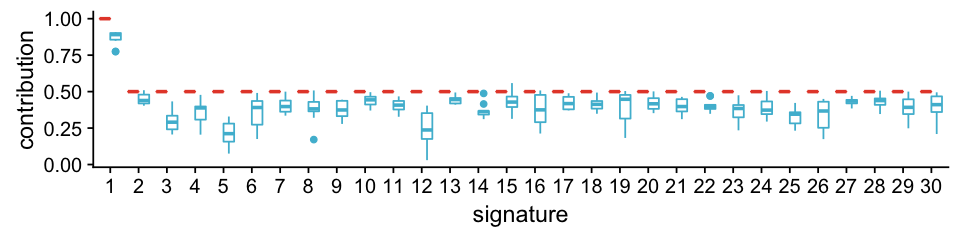

In [231]:
#####  Figure on benchmark A

options(repr.plot.width=8, repr.plot.height=2)
ggplot(d %>% 
       filter(
           sigtype==30 & signature==sig2 &
           sig1==1 &
           noise==10 & ratio==5 & nmut==500 &
          method %in% c('AICcZ', 'target')
       )) +
geom_boxplot(aes(x=signature, y=contribution, color=method), show.legend=F) +
scale_color_npg()
# facet_wrap(~as.factor(sig2), nrow=1)

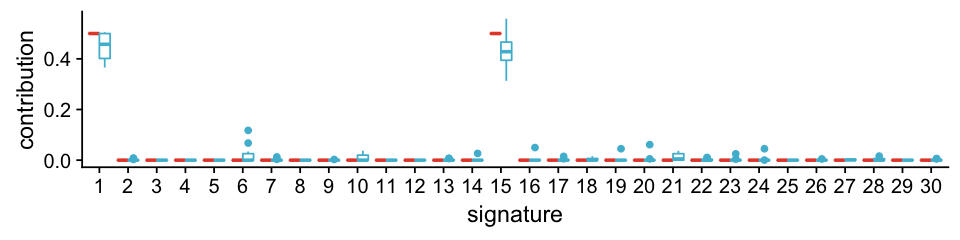

In [232]:
#####  Figure on benchmark B

options(repr.plot.width=8, repr.plot.height=2)
ggplot(d %>% 
       filter(
           sigtype==30 & sig1==1 & sig2==15 &
           noise==10 & ratio==5 & nmut==500 &
          method %in% c('AICcZ', 'target')
       )) +
geom_boxplot(aes(x=signature, y=contribution, color=method), show.legend=F) +
scale_color_npg()
# facet_wrap(~as.factor(sig2), nrow=1)

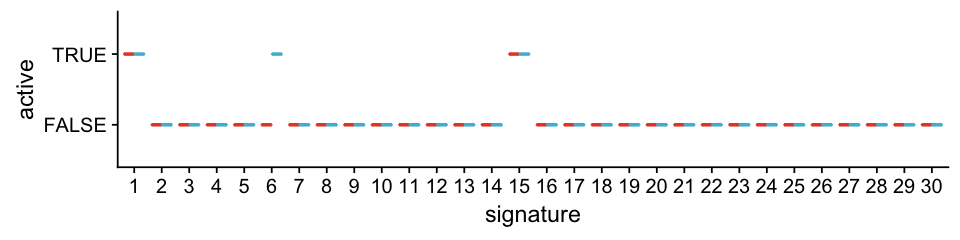

In [233]:
#####  Figure on benchmark C

options(repr.plot.width=8, repr.plot.height=2)
ggplot(d %>% 
       filter(
           sigtype==30 & sig1==1 & sig2==15 & noise==10 & ratio==5 & nmut==500 & 
           method %in% c('AICcZ', 'target')) %>%
       group_by(method, signature) %>%
       summarise(
           contribution = mean(contribution)
       ) %>%
       mutate(active = contribution > 0.02)
      ) +
geom_boxplot(aes(x=signature, y=active, color=method), show.legend=F) +
scale_color_npg()

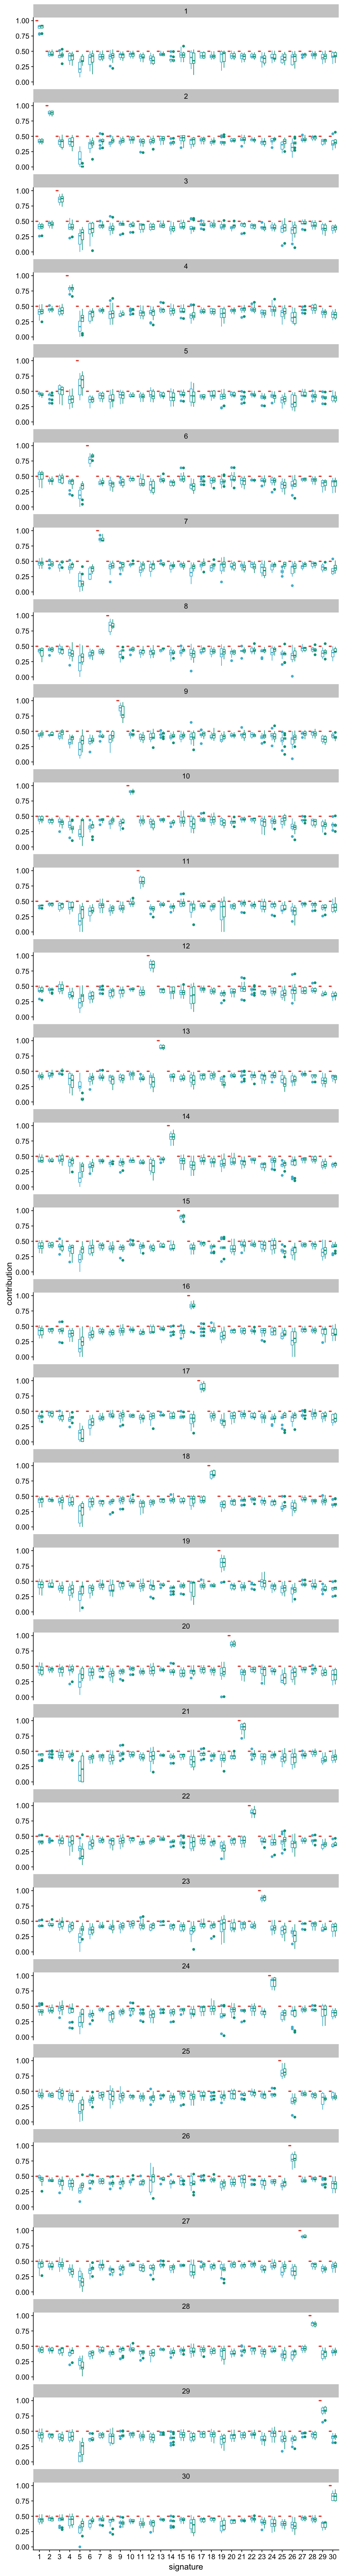

In [234]:
#####  Figure on benchmark - supplementary
options(repr.plot.width=8, repr.plot.height=2*30)
ggplot(d %>% 
       filter(
           sigtype==30 & signature==sig2 &
           noise==10 & ratio==5 & nmut==500 &
          method %in% c('AICc', 'dSigs', 'target')
       )) +
geom_boxplot(aes(x=signature, y=contribution, color=method), show.legend=F) +
facet_wrap(~sig1, nrow=30) + 
scale_color_npg()

In [235]:
d %>% 
   filter(
        sigtype==30 & signature==sig2 & sig2!=sig1 & signature!=sig1 &
        ratio==7 &
        method %in% c('AICc', 'AICcZ', 'MLE', 'dSigs', 'target')
    ) %>%
    group_by(noise, nmut, method) %>%
    summarise(
        n=n(),
        m=round(mean(contribution), 4),
        sd=round(sd(contribution), 4)
    )


noise,nmut,method,n,m,sd
10,50,target,8700,0.3000,0.0000
10,50,AICc,8700,0.1581,0.1307
10,50,AICcZ,8700,0.1400,0.1286
10,50,MLE,8700,0.1618,0.1205
10,50,dSigs,8700,0.1603,0.1373
10,500,target,8700,0.3000,0.0000
10,500,AICc,8700,0.2323,0.0694
10,500,AICcZ,8700,0.2157,0.0751
10,500,MLE,8700,0.2270,0.0624
10,500,dSigs,8700,0.2417,0.0630


In [236]:
d %>% 
   filter(
        sigtype==30 & signature!=sig2 & sig2!=sig1 & signature!=sig1 &
        ratio==7 & nmut== 500 &
        method %in% c('AICc', 'AICcZ', 'MLE', 'dSigs', 'target')
    ) %>%
    group_by(noise, nmut, method) %>%
    summarise(
        n=n(),
        m=round(mean(contribution), 4),
        sd=round(sd(contribution), 4)
    )


d %>% 
   filter(
        sigtype==30 & signature!=sig2 & sig2!=sig1 & signature!=sig1 &
        ratio==7 & nmut == 50 &
        method %in% c('AICc', 'AICcZ', 'MLE', 'dSigs', 'target')
    ) %>%
    group_by(noise, nmut, method) %>%
    summarise(
        n=n(),
        m=round(mean(contribution), 4),
        sd=round(sd(contribution), 4)
    )



noise,nmut,method,n,m,sd
10,500,target,243600,0.0000,0.0000
10,500,AICc,243600,0.0067,0.0187
10,500,AICcZ,243600,0.0056,0.0171
10,500,MLE,243600,0.0075,0.0180
10,500,dSigs,243600,0.0059,0.0186
20,500,target,243600,0.0000,0.0000
20,500,AICc,243600,0.0092,0.0229
20,500,AICcZ,243600,0.0066,0.0183
20,500,MLE,243600,0.0107,0.0243
20,500,dSigs,243600,0.0091,0.0255


noise,nmut,method,n,m,sd
10,50,target,243600,0.0000,0.0000
10,50,AICc,243600,0.0144,0.0447
10,50,AICcZ,243600,0.0123,0.0405
10,50,MLE,243600,0.0145,0.0403
10,50,dSigs,243600,0.0129,0.0456
20,50,target,243600,0.0000,0.0000
20,50,AICc,243600,0.0161,0.0463
20,50,AICcZ,243600,0.0131,0.0408
20,50,MLE,243600,0.0166,0.0427
20,50,dSigs,243600,0.0149,0.0480


In [262]:
d_sn <- d %>% 
    filter(
        sig1 != sig2 & signature != sig1
    ) %>%
    mutate(
        signal_noise =  as.factor(ifelse(signature==sig2, TRUE, FALSE))
    )

In [263]:
d_sn %>% filter(method == 'target' & value > 0 & value < 0.2) 

sigtype,sig1,sig2,ratio,noise,nmut,replica,method,signature,value,contribution,signal_noise


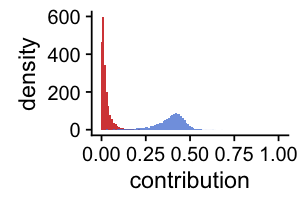

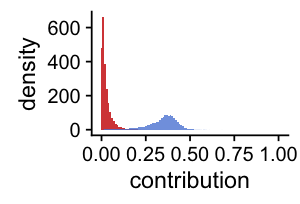

In [267]:
method_analyzed <- c('AICcZ')

options(repr.plot.width=2.5, repr.plot.height=1.7)

ggplot(d_sn %>% 
       filter(
          value > 0 &
          sigtype==30 & noise==10 & ratio==5 & nmut==500 &
          method %in% method_analyzed
       )) +
geom_histogram(aes(x=contribution, fill=signal_noise, y=..ndensity..), binwidth=0.01, show.legend=F, position="identity") +
expand_limits(x=1) +
scale_fill_startrek(alpha=0.8) +
ylab("density") + xlab("contribution")



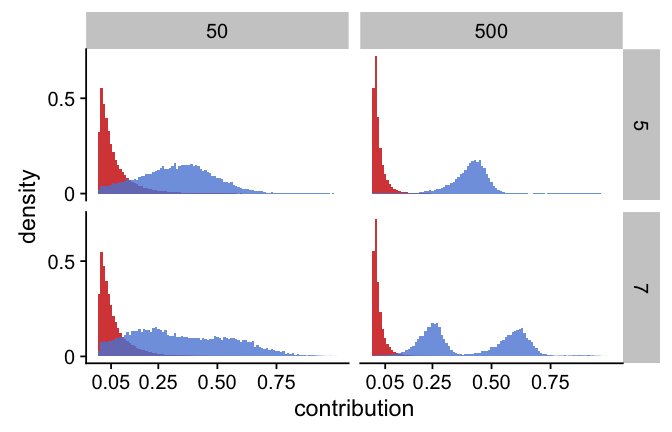

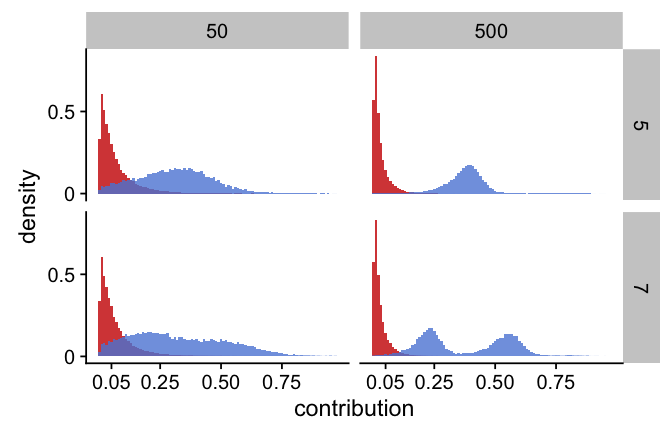

In [256]:
signal_vs_noise <- function(method_analyzed, e) {
    options(repr.plot.width=2.8 * 2, repr.plot.height=1.8 * 2)
    ggplot(d_sn %>% 
           filter(
              value > 0 & value < 1 &
              sigtype==30 & noise==e &
              method %in% method_analyzed
           )) +
    geom_histogram(aes(x=contribution, fill=signal_noise, y=..ndensity..), binwidth=0.01, show.legend=F, position="identity") +
    expand_limits(x=0.9) +
    scale_fill_startrek(alpha=0.8) +
    scale_x_continuous(name="contribution", breaks=c(0.05, 0.25, 0.5, 0.75)) +
    scale_y_continuous(name="density", breaks=c(0, 500), labels=c(0, 0.5)) +
    ylab("density") + xlab("contribution") + 
    facet_grid(ratio ~ nmut)
}

signal_vs_noise(c('AICc'), 10)
signal_vs_noise(c('AICc'), 20)

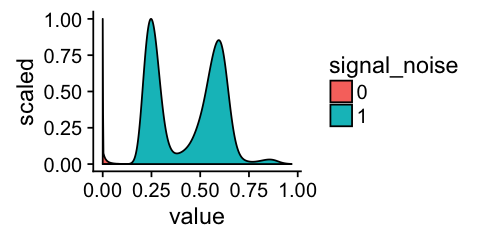

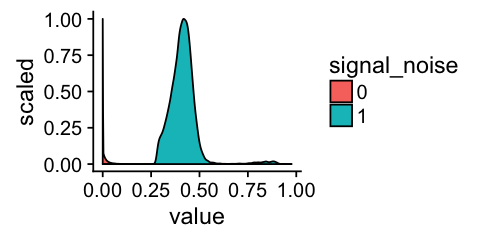

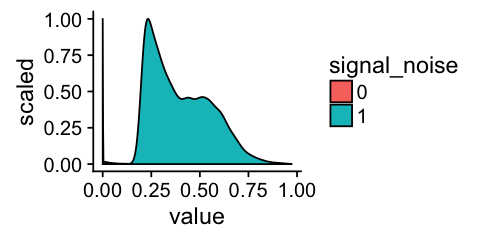

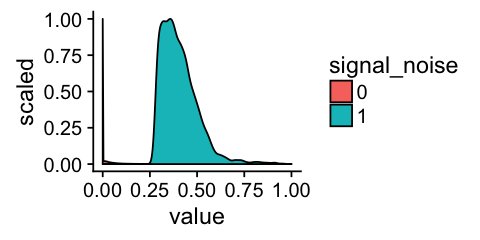

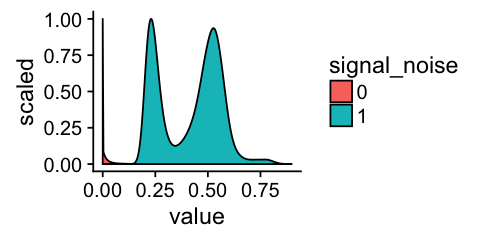

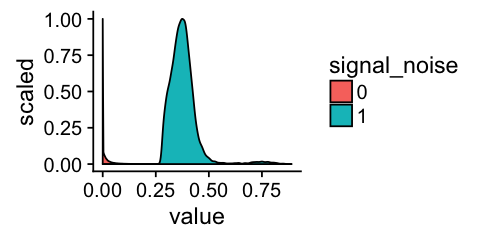

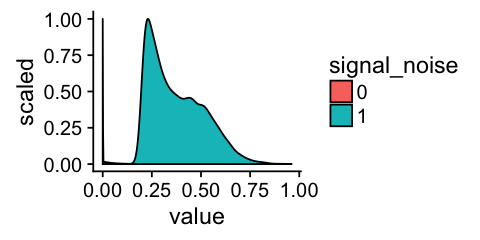

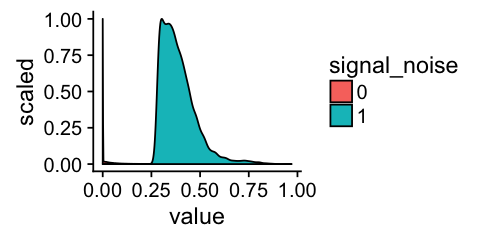

In [241]:
options(repr.plot.width=4, repr.plot.height=2)
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="MLE" & noise==10 & ratio==7 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="MLE" & noise==10 & ratio==5 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))


#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="MLE" & noise==10 & ratio==7 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################

d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="MLE" & noise==10 & ratio==5 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

############################################################################################

d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="MLE" & noise==20 & ratio==7 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="MLE" & noise==20 & ratio==5 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))


#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="MLE" & noise==20 & ratio==7 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################

d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="MLE" & noise==20 & ratio==5 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))



# options(repr.plot.width=3, repr.plot.height=3)
# ggplot(d_signal_noise %>% filter(signal_noise == 0)) +
# geom_density(aes(x=value, y=..scaled.., fill=as.factor(noise)))

In [242]:
s0 = d %>% 
    filter(sig2 == signature & ratio == 5 & noise == 20 & nmut == 50 &
           method %in% c('dSigs', 'AICcZ', 'target')) %>%
    group_by(sig1, sig2, method)    %>% 
    summarise(
        n = n(),
        mvalue = mean(value, na.rm = TRUE)
    )

s = s0 %>%
    spread(method, mvalue)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


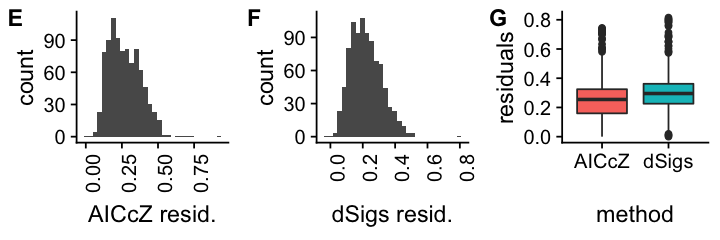

In [243]:
s2 = s %>% mutate(dSigs = target - dSigs, AICcZ=target-AICcZ) %>%
    select(-target)

options(repr.plot.width=6, repr.plot.height=2)
plot_grid(ggplot(s2) + geom_histogram(aes(AICcZ)) +
          theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
              expand_limits(x=0.8) +
          xlab("AICcZ resid."),

          ggplot(s2) + geom_histogram(aes(dSigs)) +
          theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
              expand_limits(x=0.8) +
          xlab("dSigs resid."),
          
          ggplot(s0 %>% filter(method != "target")) +
          geom_boxplot(aes(y=mvalue, x=method, fill=method), show.legend=F) +
          ylab("residuals"),
          
          labels = c("E", "F", "G"), align = "h", ncol=3)


In [244]:
options(repr.plot.width=4, repr.plot.height=1.8)
plot_grid(ggplot(s2) + geom_point(aes(ds, mle)),
          ggplot(s) + geom_point(aes(ds, mle)),
          labels = c("A", "B"), align = "h")

ERROR: Error in FUN(X[[i]], ...): object 'ds' not found
